In [11]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

class Animal:
    def __init__(self, name, age, breed, health_status, species):
        self.name = name
        self.age = age
        self.breed = breed
        self.health_status = health_status
        self.species = species

class PetShelter:
    def __init__(self):
        self.animals = []

    def add_animal(self, animal):
        self.animals.append(animal)

    def remove_animal(self, name):
        self.animals = [animal for animal in self.animals if animal.name != name]

    def view_animals(self):
        for animal in self.animals:
            print(f"{animal.name}: {animal.species}, {animal.breed}, Age: {animal.age}, Health: {animal.health_status}")

    def get_data_frame(self):
        return pd.DataFrame([vars(animal) for animal in self.animals])

shelter = PetShelter()
shelter.add_animal(Animal("Max", 3, "Golden Retriever", "Healthy", "Dog"))
shelter.add_animal(Animal("Whiskers", 2, "Siamese", "Sick", "Cat"))
shelter.add_animal(Animal("Buddy", 4, "Labrador", "Healthy", "Dog"))
shelter.add_animal(Animal("Mittens", 5, "Persian", "Healthy", "Cat"))


df = shelter.get_data_frame()
df['species'] = df['species'].map({"Dog": 0, "Cat": 1})
df['health_status'] = df['health_status'].map({"Healthy": 1, "Sick": 0})

X = df[['age', 'species']]
y = df['health_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f' is {y_pred}')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division=1)


print(f"Classification Metrics:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")

 is [1]
Classification Metrics:
Accuracy: 0.00
Precision: 0.00
Recall: 1.00


In [12]:
import seaborn as sns

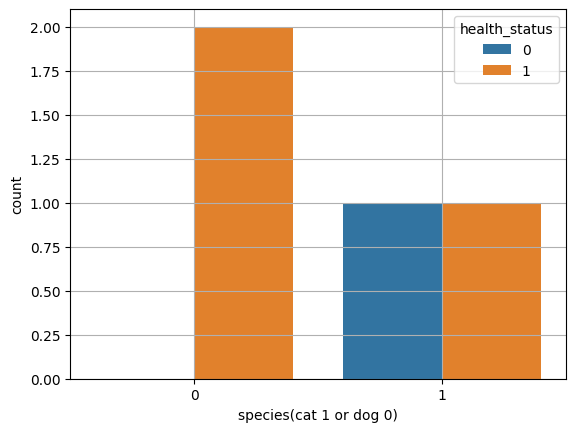

In [15]:
sns.countplot(x=df['species'],hue=df['health_status'])
plt.xlabel('species(cat 1 or dog 0)')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [16]:
while True:
    print("\nPet Shelter System")
    print("1. Add Pet")
    print("2. Remove Pet")
    print("3. View Pets")
    print("4. Exit")

    try:
        option = int(input("Enter your option: "))

        if option == 1:
            name = input("Enter pet's name: ")
            age = int(input("Enter pet's age: "))
            breed = input("Enter pet's breed: ")
            health_status = input("Enter pet's health status (Healthy/Sick): ")
            species = input("Enter pet's species (Dog/Cat): ")
            
            shelter.add_animal(Animal(name, age, breed, health_status, species))
            print(f"{name} has been added to the shelter!")

        elif option == 2:
            name = input("Enter the name of the pet to remove: ")
            shelter.remove_animal(name)
            print(f"{name} has been removed.")

        elif option == 3:
            print("\nCurrent Pets in Shelter:")
            shelter.view_animals()

        elif option == 4:
            print("Exiting...")
            break

        else:
            print("Invalid option. Please choose a valid number.")

    except ValueError:
        print("Please enter a valid numeric option.")



Pet Shelter System
1. Add Pet
2. Remove Pet
3. View Pets
4. Exit


Enter your option:  2
Enter the name of the pet to remove:  Max


Max has been removed.

Pet Shelter System
1. Add Pet
2. Remove Pet
3. View Pets
4. Exit


Enter your option:  3



Current Pets in Shelter:
Whiskers: Cat, Siamese, Age: 2, Health: Sick
Buddy: Dog, Labrador, Age: 4, Health: Healthy
Mittens: Cat, Persian, Age: 5, Health: Healthy

Pet Shelter System
1. Add Pet
2. Remove Pet
3. View Pets
4. Exit


Enter your option:  4


Exiting...


In [17]:
print(df)

       name  age             breed  health_status  species
0       Max    3  Golden Retriever              1        0
1  Whiskers    2           Siamese              0        1
2     Buddy    4          Labrador              1        0
3   Mittens    5           Persian              1        1
